In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold, train_test_split
sns.set_theme()
np.random.seed(12)

In [110]:
df = pd.read_csv("data.csv")
print(df)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

Text(0.5, 1.0, 'Correlation Matrix for Predictors')

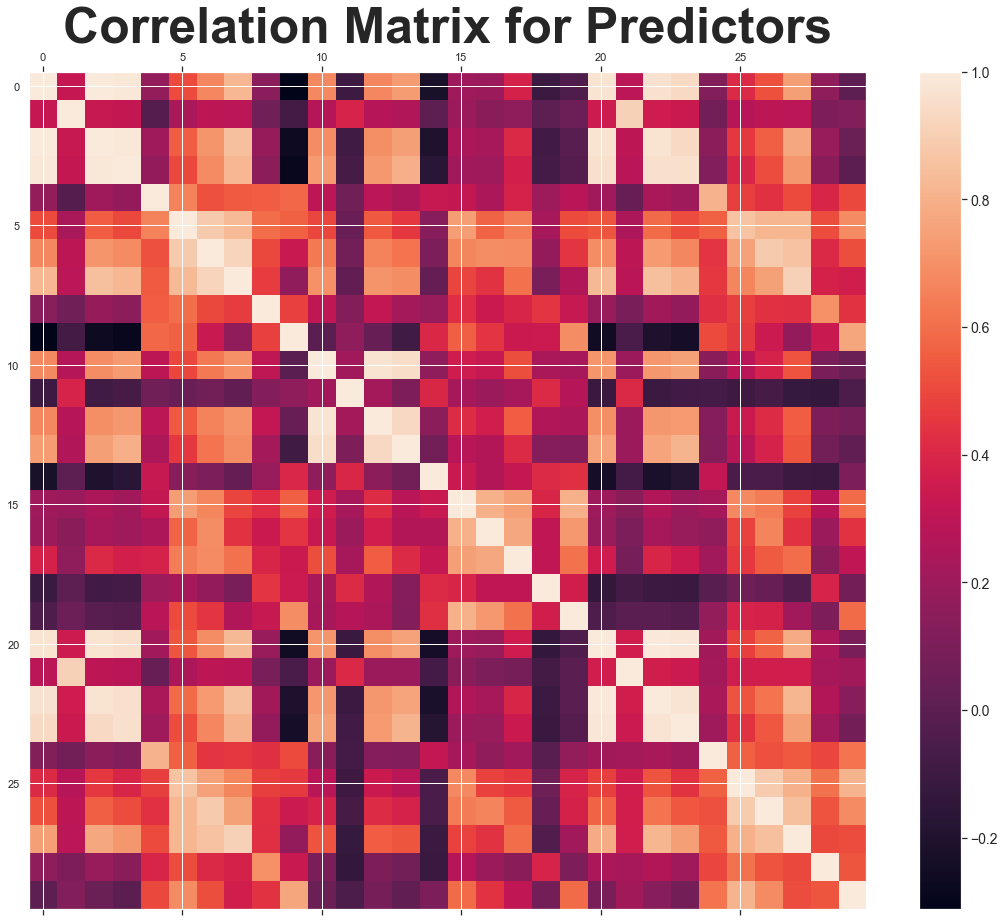

In [111]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.drop(['id'], axis=1).corr(), fignum=f.number)
cb = plt.colorbar()
cb.ax.tick_params(labelsize = 14)
plt.title('Correlation Matrix for Predictors', fontsize = 50, fontweight = "bold")

diagnosis                    index           B            M     Ratio
0                      radius_mean   12.146524    17.462830  0.695564
1                     texture_mean   17.914762    21.604906  0.829199
2                   perimeter_mean   78.075406   115.365377  0.676766
3                        area_mean  462.790196   978.376415  0.473019
4                  smoothness_mean    0.092478     0.102898  0.898727
5                 compactness_mean    0.080085     0.145188  0.551593
6                   concavity_mean    0.046058     0.160775  0.286473
7              concave points_mean    0.025717     0.087990  0.292276
8                    symmetry_mean    0.174186     0.192909  0.902944
9           fractal_dimension_mean    0.062867     0.062680  1.002988
10                       radius_se    0.284082     0.609083  0.466410
11                      texture_se    1.220380     1.210915  1.007817
12                    perimeter_se    2.000321     4.323929  0.462617
13                  

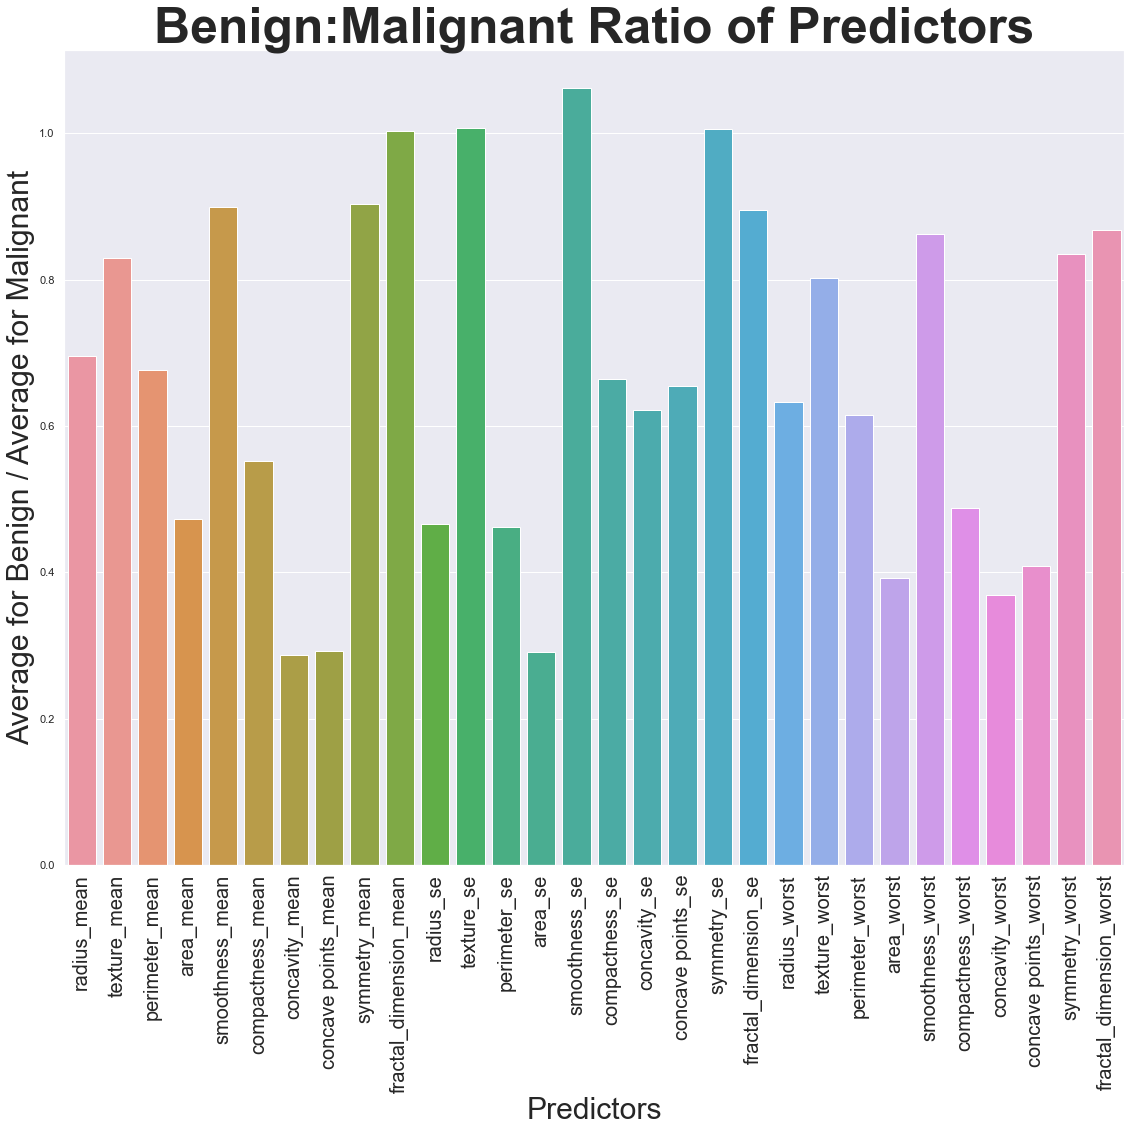

In [112]:
temp = df.groupby("diagnosis").mean().drop(['id'], axis=1).T
temp.reset_index(inplace = True)
temp["Ratio"] = temp["B"] / temp["M"]
print(temp)

plt.figure(figsize=(19, 15))
sns.barplot(data = temp, x = "index", y = "Ratio")
plt.xticks(rotation='vertical', fontsize = 20)
plt.title('Benign:Malignant Ratio of Predictors', fontsize = 50, fontweight = "bold")
plt.xlabel("Predictors", fontsize = 30)
plt.ylabel("Average for Benign / Average for Malignant", fontsize = 30)
plt.show()

In [113]:
new_columns = [pd.DataFrame(np.random.normal(0, 1, size=(len(df), 1)), columns=['col{}'.format(i+1)]) for i in range(1000)]
df = pd.concat([df] + new_columns, axis=1)
df.to_csv("noisy_data.csv")

In [114]:
X = df.drop(['id', "diagnosis"], axis=1)
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [115]:
#log_reg = LogisticRegression(max_iter = 10000)

#cv = KFold(n_splits=5)
#scores = cross_val_score(log_reg, X_train, y_train, cv=cv)
#average_accuracy = scores.mean()
#print("Accuracies: ", scores)

#log_reg.fit(X_train, y_train)
#accuracy = log_reg.score(X_test, y_test)
#print("Test Accuracy: ", accuracy)

In [116]:
def convert_array(arr):
    new_arr = []
    for i in arr:
        if i == "B":
            new_arr.append(0)
        elif i == "M":
            new_arr.append(1)
    return new_arr

y_train = tf.convert_to_tensor(convert_array(y_train))
y_test = tf.convert_to_tensor(convert_array(y_test))

X_train = tf.convert_to_tensor(X_train.to_numpy())
X_test = tf.convert_to_tensor(X_test.to_numpy())

def plot_history(history):
    train_loss = history.history['loss']
    test_loss = history.history['val_loss']
    train_acc = history.history['accuracy']
    test_acc = history.history['val_accuracy']
    epochs = range(len(train_loss))

    # plot loss
    plt.clf()
    fig = plt.figure(figsize=(19, 15))
    plt.plot(train_loss, label='train_loss')
    plt.plot(test_loss, label='test_loss')
    plt.xlabel('Epoch', fontsize = 50)
    plt.ylabel('Loss', fontsize = 50)
    plt.xticks(epochs, rotation='vertical', fontsize = 20)
    plt.legend(loc='best')
    plt.title('Training and Testing Loss', fontsize = 50, fontweight = "bold")
    # plt.savefig("loss.png")
    plt.show()

    # plot acc
    plt.clf()
    fig = plt.figure(figsize=(19, 15))
    plt.plot(train_acc, label='train_acc')
    plt.plot(test_acc, label='test_acc')
    plt.xlabel('Epoch', fontsize = 50)
    plt.ylabel('Accuracy', fontsize = 50)
    plt.xticks(epochs, rotation='vertical', fontsize = 20)
    plt.legend(loc='best')
    plt.title('Training and Testing Accuracy', fontsize = 50, fontweight = "bold")
    # plt.savefig("acc.png")
    plt.show()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 2)                 2062      
                                                                 
Total params: 2,062
Trainable params: 2,062
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
15/15 [==============================] - 0s 7ms/step - loss: 3458.9802 - accuracy: 0.4330 - val_loss: 40.4757 - val_accuracy: 0.7982
Epoch 2/50
15/15 [==============================] - 0s 2ms/step - loss: 1845.3210 - accuracy: 0.5824 - val_loss: 5196.3486 - val_accuracy: 0.3684
Epoch 3/50
15/15 [==============================] - 0s 3ms/step - loss: 2496.1467 - accuracy: 0.4923 - val_loss: 5700.0669 - val_accuracy: 0.3684
Epoch 4/50
15/15 [==============================] - 0s 2ms/step - loss: 1870.5100 - accuracy: 0.6022 - val_loss: 460.7661 - val_accuracy: 0.815

<Figure size 432x288 with 0 Axes>

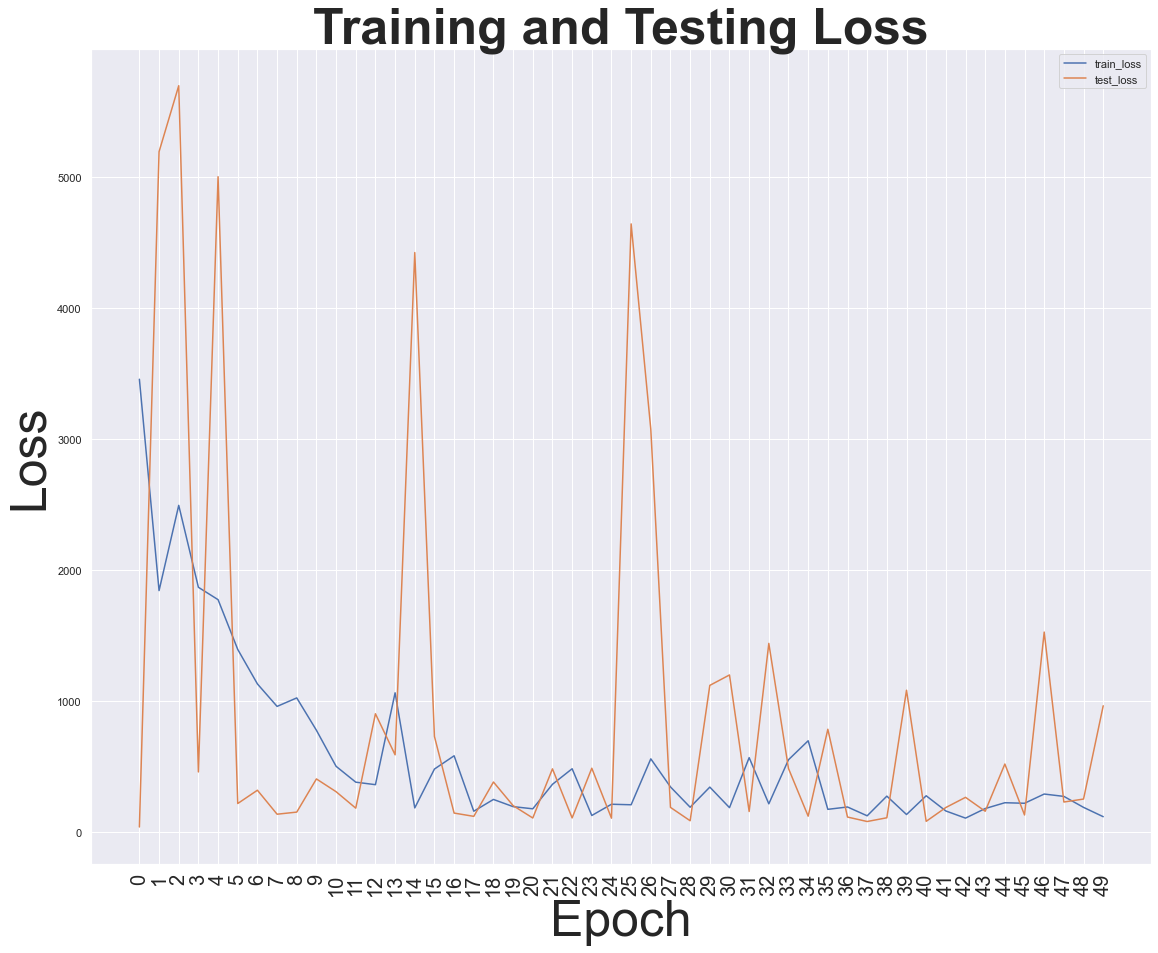

<Figure size 432x288 with 0 Axes>

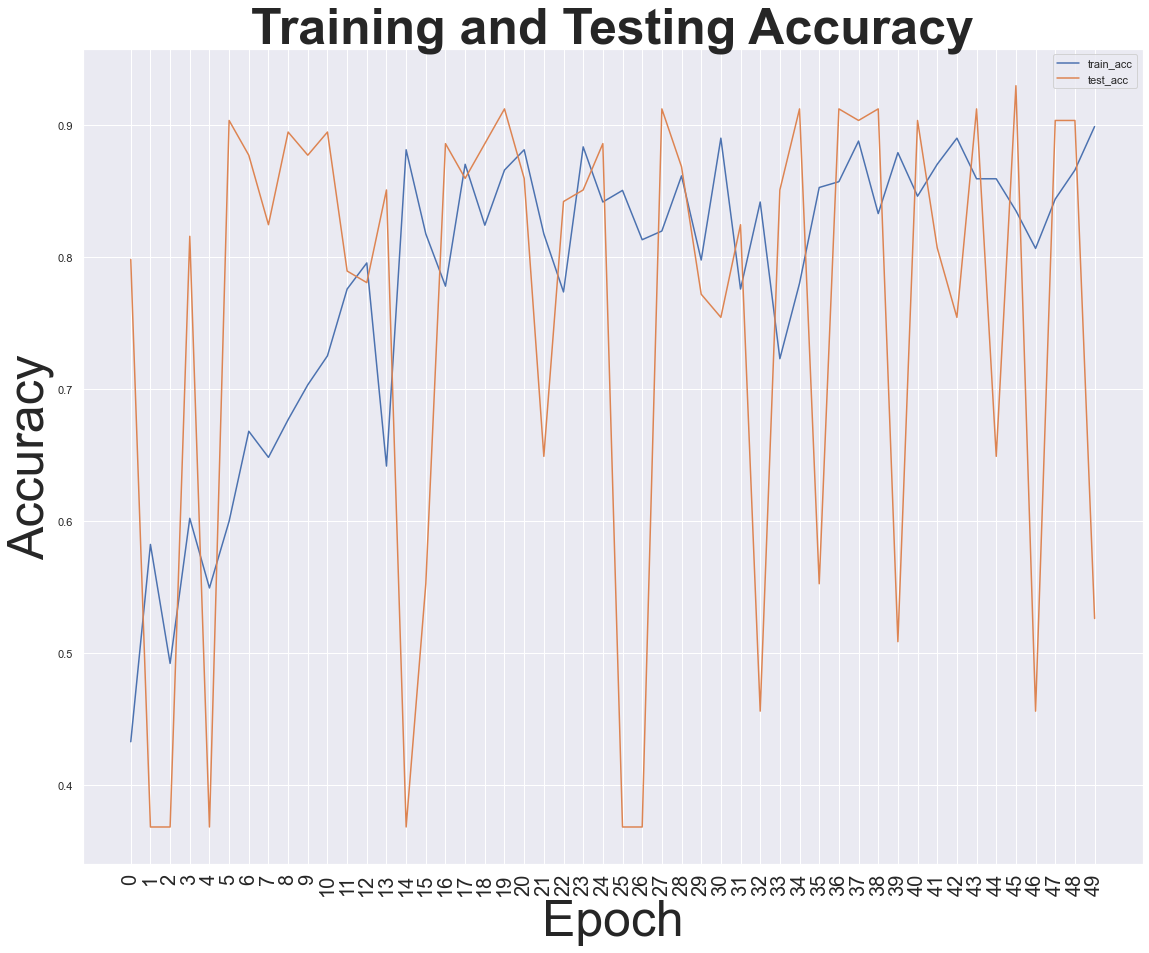

In [117]:
input_shape = (X_train.shape[1],)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=input_shape),
    tf.keras.layers.Dense(2, activation = "softmax")
])

# hyperparameters
learning_rate = .01
epochs = 50
batch_size = 32

# optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
# optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# train the model

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

# plot history

plot_history(history)